## Introduction 

This project focuses on Dynamic Model SEIR (Susceptible Exposed Infected Recovered) to model the epidemic spread such as COVID-19. I explored how different variables affect the spread of the epidemic. I also explored the effect of various modelling techniques, namely Discrete Time Modelling, Continuous Time Modelling, and Stochastic Modelling. Finally, I performed a Steady State Analysis using Cobwebbing, Phase Plane Analysis, and the Dynamic of Long Time Horizon. 


### Part 1 - Model Statement and Description

**SEIR (Susceptible Exposed Infected Recovered) is an algorithm that try to model the epidemic spread such as Covid-19.   
It contains 4 main compenents:**  
(1) $S_{i+1} = S_i + \alpha - \beta*\frac{I_i}{N}*S_i$  
(2) $E_{i+1} = E_i + \beta*\frac{I_i}{N}*S_i - \gamma*E_{i}$    
(3) $I_{i+1} = I_i + \gamma*E_{i} - \theta*I_i$  
(4) $R_{i+1} = R_i + \theta*I_i$

$S_i$ = Number susceptible individuals at timestamp $i$  
$E_i$ = Number of exposed individuals at time step $i$  
$I_i$ = Number of infected individuals at time step $i$  
$R_i$ = Number of recovered individuals at time step $i$  
$\alpha$ = Number of people being born at each time step  
$\beta$ = Probability of disease transmission per contact  
$\gamma$ = Probability of becoming infected, given individual is exposed  
$\theta$ = Recovery rate of infected person

**Assumption:**
- $\alpha$ is non-negative integer, and is a constant that is we have unchanging of birth.
- $\beta$, $\gamma$, $\theta$ is within $[0, 1]$
- We will not be including death rate. 
- The population size at any time is equal to $S_i$ + $E_i$ + $I_i$ + $R_i$ or $S_0$ + $E_0$ + $I_0$ + $R_0$ + $\alpha*i$

### Part 2 - Discrete Time Modelling

Lets try modeling the system in discrete time. We will simulate the behaviour of the coupled dynamical system in various initial conditions and model parameters. 

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
from math import log10
from scipy.integrate import solve_ivp

# Define SEIR generator
def SEIR_generator(alpha, beta, gamma, theta):
    def S(seir):
        return seir[0] + alpha - beta*(seir[2]/sum(seir))*seir[0]
    def E(seir):
        return seir[1] + beta*(seir[2]/sum(seir))*seir[0] - gamma*seir[1]
    def I(seir):
        return seir[2] + gamma*seir[1] - theta*seir[2]
    def R(seir):
        return seir[3] + theta*seir[2]
    
    SEIR = lambda seir: np.array([S(seir), E(seir), I(seir), R(seir)])
    return SEIR


# SEIR up to certain timestamp
def SEIR_values(params, SEIR_init, max_iter, verbose=False):
    SEIR = SEIR_generator(**params) # Function for getting SEIR
    SEIRs = np.zeros(shape=(max_iter, 4))
    SEIR_next = SEIR_init
    for i in range(max_iter):
        if verbose: print('t: {0}, SEIR: {1}'.format(i, SEIR_next))
        SEIRs[i, :] = SEIR_next
        SEIR_next = SEIR(SEIR_next)
        
    return SEIRs

# Function for plotting SEIR
def plot_SEIR(alpha=20, beta=0.8, gamma=0.5, theta=0.2, S_init=1000, E_init=100, I_init=10, time_length=100, S=True, E=True, I=True, R=True):
    params = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'theta':theta}
    t=range(time_length)
    SEIR_init = np.array([S_init, E_init, I_init, 0]) # Initial recovered is 0
    SEIRs = SEIR_values(params=params, SEIR_init=SEIR_init, max_iter=time_length, verbose=False)
    plt.figure(figsize=(10,6))
    if S:
        plt.plot(t, SEIRs[:, 0], label='S', color="blue")
    if E:
        plt.plot(t, SEIRs[:, 1], label='E', color="orange")
    if I:
        plt.plot(t, SEIRs[:, 2], label='I', color="red")
    if R:
        plt.plot(t, SEIRs[:, 3], label='R', color="green")
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Compartment Populations')
    plt.show()
    
# Function for plotting SEIR
def plot_SEIR(alpha=20, beta=0.8, gamma=0.5, theta=0.2, S_init=1000, E_init=100, I_init=10, time_length=100, S=True, E=True, I=True, R=True, ax=None):
    params = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'theta':theta}
    t=range(time_length)
    SEIR_init = np.array([S_init, E_init, I_init, 0]) # Initial recovered is 0
    SEIRs = SEIR_values(params=params, SEIR_init=SEIR_init, max_iter=time_length, verbose=False)
    if ax:
        plot = ax
        plot.set_xlabel('Time')
        plot.set_ylabel('Compartment Populations')

    else:
        plot = plt
        plt.figure(figsize=(10,6))
        plt.xlabel('Time')
        plt.ylabel('Compartment Populations')

    if S:
        plot.plot(t, SEIRs[:, 0], label='S', color="blue")
    if E:
        plot.plot(t, SEIRs[:, 1], label='E', color="orange")
    if I:
        plot.plot(t, SEIRs[:, 2], label='I', color="red")
    if R:
        plot.plot(t, SEIRs[:, 3], label='R', color="green")

    plot.legend()
    if ax == None:
        plt.show()

    

## Simulation  

In [2]:
# Checkbox widget
checkbox = lambda description: widgets.Checkbox(value=True, description=description, 
                                                disabled=False ,indent=False, layout={'width': '130px'})

# Int slider widget
slider_int = lambda value, minimum, maximum, step, description: widgets.IntSlider(
    value=value, min=minimum, max=maximum, step=step, description=description, 
    layout={'width': '500px','margin':'0 0 10px 0'}
)

# Float slider widget
slider_float = lambda value, minimum, maximum, step, description: widgets.FloatSlider(
    value=value, min=minimum, max=maximum, step=step, description=description,
    readout_format='.' + str(int(log10(1/step)//1)) + 'f',
    layout={'width': '500px','margin':'0 0 10px 0'}
)

In [3]:
S_box =checkbox("Susceptible"); E_box = checkbox("Exposed"); I_box = checkbox("Infected"); R_box = checkbox("Recovered")
checkboxes = widgets.HBox([S_box, E_box, I_box, R_box], layout={'width': '500px','margin':'0 0 10px 0'})

S_slide = slider_int(1000, 0, 10000, 1, "$S_0:$")
E_slide = slider_int(100, 0, 10000, 1, "$E_0:$")
I_slide = slider_int(10, 0, 10000, 1, "$I_0:$")
T_slide = slider_int(100, 0, 1000, 1, "$Time:$")
alpha_slide = slider_int(20, 0, 1000, 1, '$\\alpha:$')
beta_slide = slider_float(0.8, 0, 1, 0.00001, '$\\beta\:$')
gamma_slide = slider_float(0.5, 0, 1, 0.00001, '$\\gamma\:$')
theta_slide = slider_float(0.2, 0, 1, 0.00001, '$\\theta\:$')
sliders = widgets.VBox([alpha_slide, beta_slide, gamma_slide, theta_slide, S_slide, E_slide, I_slide, T_slide])

out = widgets.interactive_output(plot_SEIR, {'alpha':alpha_slide, 'beta':beta_slide, 'gamma':gamma_slide, 
                                             'theta':theta_slide, 'S_init':S_slide, 'E_init':E_slide,
                                             'I_init':I_slide, 'time_length':T_slide, "S":S_box,
                                             'E':E_box, 'I':I_box, 'R':R_box}) 

ui = widgets.HBox([widgets.VBox([checkboxes, sliders]), out])
display(ui)

In [4]:
# To enter specific number, click on number, type desried number and press enter

#### Effect of $\alpha$, $\beta$, $\gamma$, $\theta$ on $S_i$, $R_i$
Due to how large $S_i$ and $R_i$ relative to $E_i$ and $I_i$, I'll first see how changing variables affect $S_i$ and $R_i$

In [5]:
# Initial Value
alpha=20
beta=0.5
gamma=0.5
theta=0.2
S_init=1000
E_init=100
I_init=10
time_length=100

$\alpha$ determine the population growth, and seems to be mainly affecting $S_i$ and $R_i$

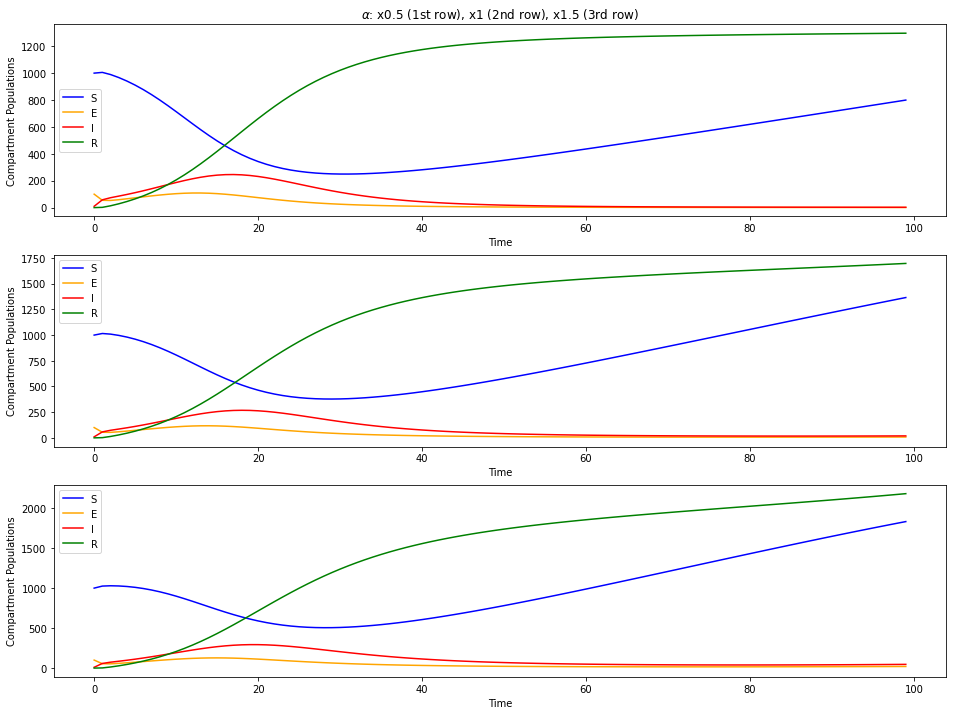

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(16, 12))
ax1.set_title("$\\alpha$: x0.5 (1st row), x1 (2nd row), x1.5 (3rd row)")
plot_SEIR(alpha=alpha*0.5, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, ax=ax1)
plot_SEIR(alpha=alpha, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, ax=ax2)
plot_SEIR(alpha=alpha*1.5, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, ax=ax3)
plt.show()

$\beta$ determine the exposure rate, and seems to increase $R_i$ and decrease $S_i$ as $\beta$ increase.

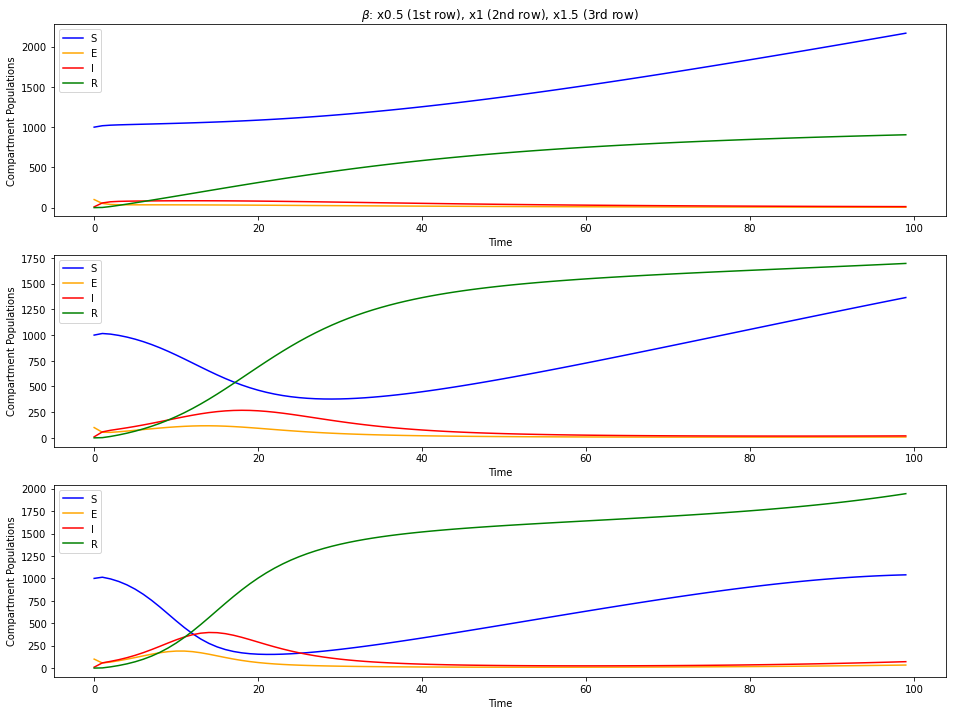

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(16, 12))
ax1.set_title("$\\beta$: x0.5 (1st row), x1 (2nd row), x1.5 (3rd row)")
plot_SEIR(alpha=alpha, beta=beta*0.5, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, ax=ax1)
plot_SEIR(alpha=alpha, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, ax=ax2)
plot_SEIR(alpha=alpha, beta=beta*1.5, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, ax=ax3)
plt.show()

$\gamma$ determine the infection rate, and seems to decrease $R_i$ and increase $S_i$ as $\gamma$ increase.

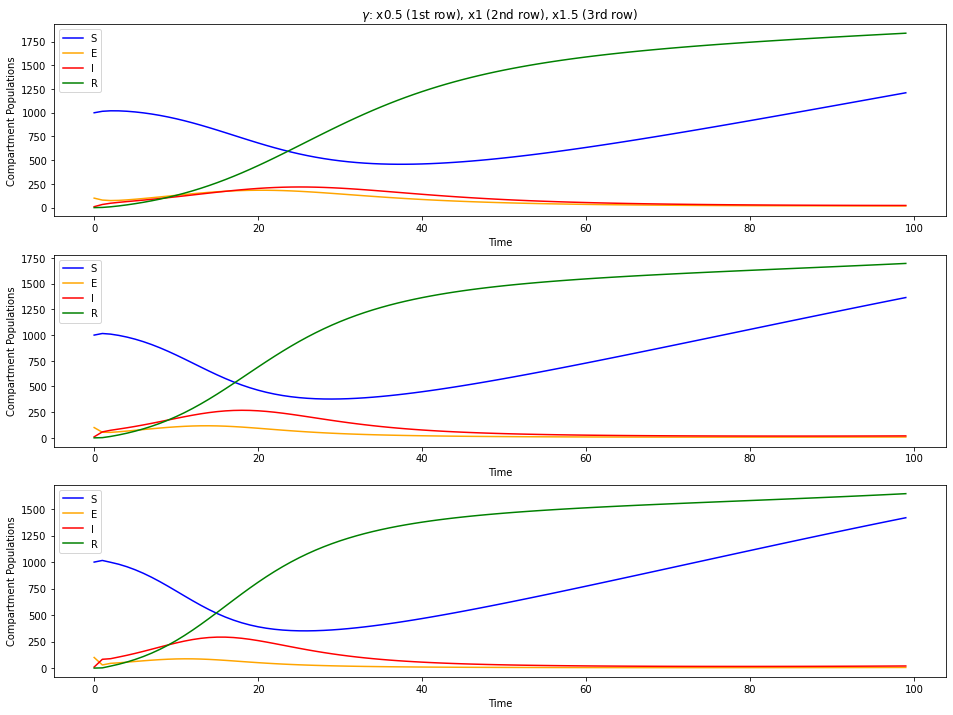

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(16, 12))
ax1.set_title("$\\gamma$: x0.5 (1st row), x1 (2nd row), x1.5 (3rd row)")
plot_SEIR(alpha=alpha, beta=beta, gamma=gamma*0.5, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, ax=ax1)
plot_SEIR(alpha=alpha, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, ax=ax2)
plot_SEIR(alpha=alpha, beta=beta, gamma=gamma*1.5, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, ax=ax3)
plt.show()

$\theta$ determine the infection rate, and seems to decrease $R_i$ and increase $S_i$ as $\theta$ increase.

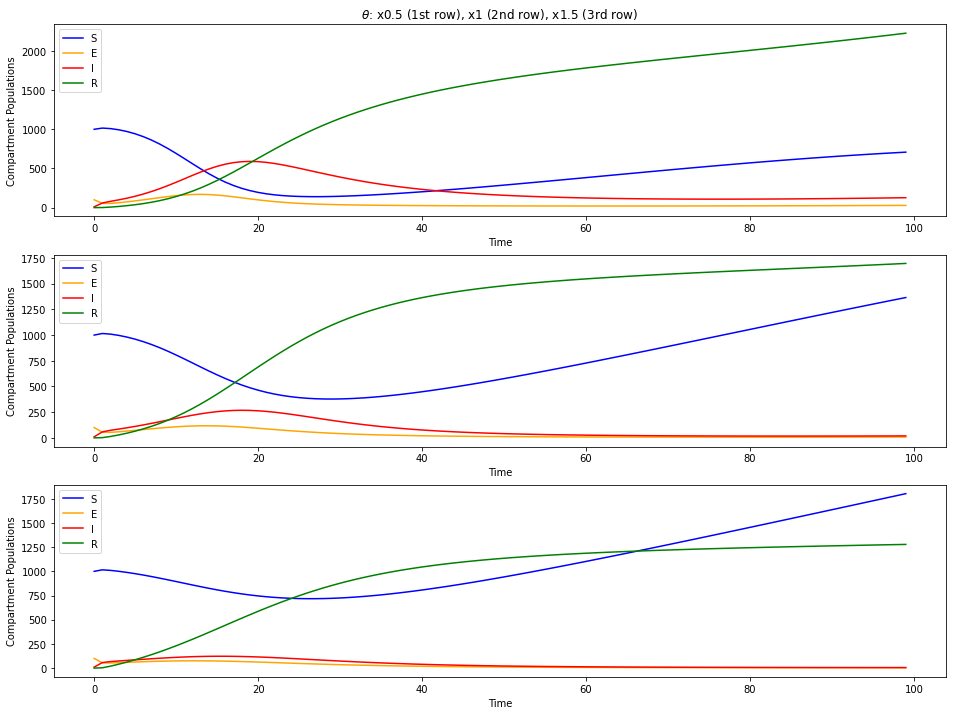

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(16, 12))
ax1.set_title("$\\theta$: x0.5 (1st row), x1 (2nd row), x1.5 (3rd row)")
plot_SEIR(alpha=alpha, beta=beta, gamma=gamma, theta=theta*0.5, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, ax=ax1)
plot_SEIR(alpha=alpha, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, ax=ax2)
plot_SEIR(alpha=alpha, beta=beta, gamma=gamma, theta=theta*1.5, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, ax=ax3)
plt.show()

#### Zig-Zag Pattern
When $\beta$, $\gamma$, $\theta$ is equal or close to 1, zig-zag patterns appear on the graphs.

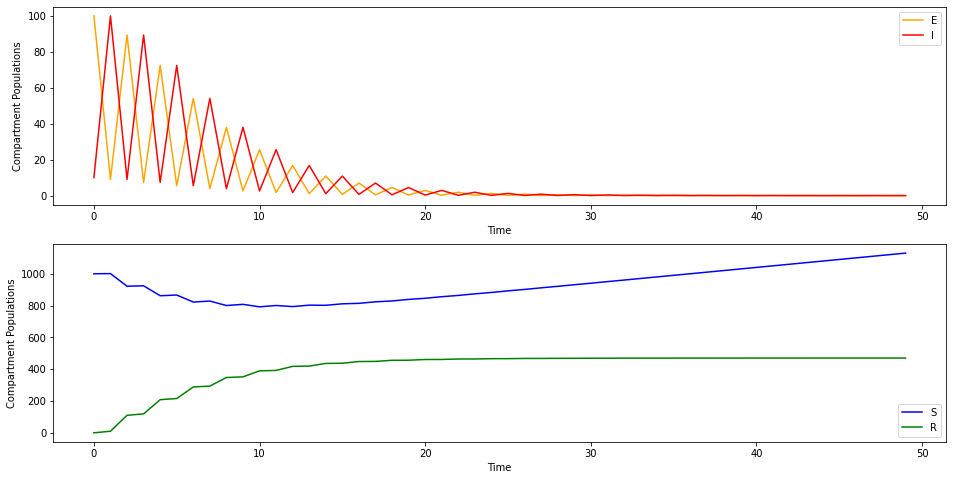

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8))
alpha=10
beta = gamma = theta = 1
time_length = 50
plot_SEIR(alpha=alpha, beta=beta, gamma=gamma, theta=theta, S=False, R=False, time_length=time_length, ax=ax1)
plot_SEIR(alpha=alpha, beta=beta, gamma=gamma, theta=theta, E=False, I=False, time_length=time_length, ax=ax2)
plt.show()

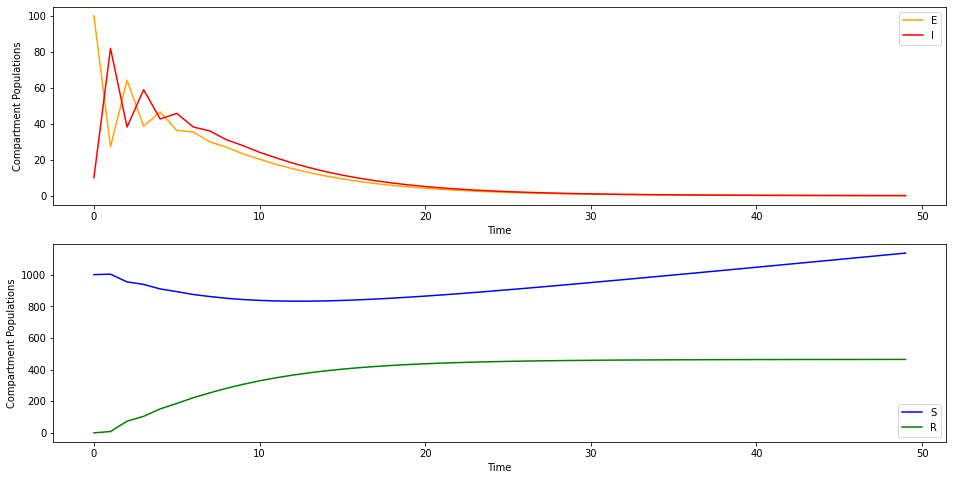

In [11]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8))
alpha=10
beta = gamma = theta = 0.8
time_length = 50
plot_SEIR(alpha=alpha, beta=beta, gamma=gamma, theta=theta, S=False, R=False, time_length=time_length, ax=ax1)
plot_SEIR(alpha=alpha, beta=beta, gamma=gamma, theta=theta, E=False, I=False, time_length=time_length, ax=ax2)
plt.show()

Increasing $\alpha$ prolong and intensify the zig-zag effect on $E$ and $I$. However, it will smooth the line $S$ and $R$, or perhaps the zig-zag effect of $S$ and $R$ is hidden or unnoticeable due to very large growth of $S$ and $R$.

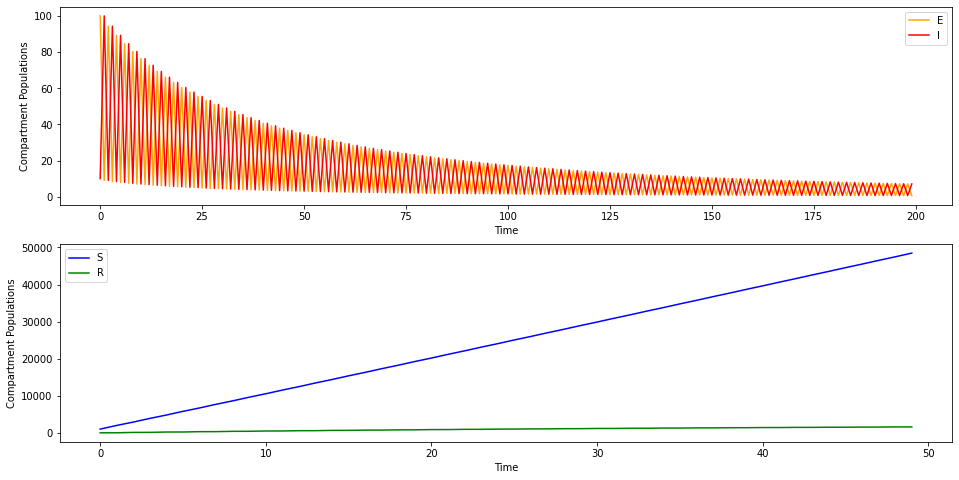

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8))
beta = gamma = theta = 1
alpha = 1000
plot_SEIR(alpha=alpha, beta=beta, gamma=gamma, theta=theta, S=False, R=False, time_length=time_length*4, ax=ax1)
plot_SEIR(alpha=alpha, beta=beta, gamma=gamma, theta=theta, E=False, I=False, time_length=time_length, ax=ax2)
plt.show()

The zig-zag effect on $E$ and $I$ is diminished when $E_0$ anc $I_0$ is equal each other (or close to each other). The effect is further diminished as $S_0$ get larger.

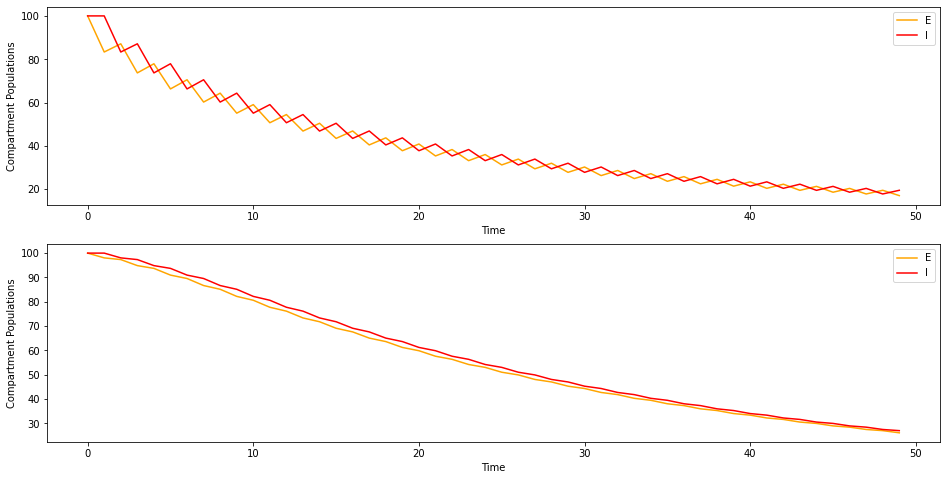

In [13]:
S_init=1000
E_init=100
I_init=100
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8))
plot_SEIR(alpha=alpha, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, S=False, R=False, time_length=time_length, ax=ax1)

S_init=10000
plot_SEIR(alpha=alpha, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, S=False, R=False, time_length=time_length, ax=ax2)

### Part 3  - Continuous Time Modelling

Let's see what happens if we move into continous time now. Express your system as a set of differential equations and once again, simulate the behaviour of your system. 

Do so for:
* multiple initial conditions
* multiple sets of model parameters
* at least two diferential equation solvers, including an RK2 implementation that should be included in this submission. 

We will plot and explain the results, and point out any differences between discrete and continuous time that is noticeable. 


In [14]:
def SEIR_gen(alpha, beta, gamma, theta):
    dSdt = lambda t, y: alpha - beta*(y[2]/sum(y))*y[0]
    dEdt = lambda t, y: beta*(y[2]/sum(y))*y[0] - gamma*y[1]
    dIdt = lambda t, y: gamma*y[1] - theta*y[2]
    dRdt = lambda t, y: theta*y[2]
    
    dSEIRdt = lambda t, y: np.array([dSdt(t,y), dEdt(t,y), dIdt(t,y), dRdt(t,y)])
    return dSEIRdt

In [15]:
def MultiHeun(df, y_init, h, t_init=0, t_max=100, tol=1e-5, verbose=False):
    y, t = y_init, t_init
    Y = np.array([y])
    T = [t]
    while t < t_max:
        if verbose: print('t={0}, y={1}'.format(t, y))
        k1 = df(t, y)
        k2 = df(t+h, y+h*df(t, y))
        y = y + h*(k1+k2)/2        
        t = t + h
        T.append(t)
        Y = np.vstack([Y, y])
    return T, Y

In [16]:
def SolveIvp(df, y_init, h, t_init=0, t_max=100, verbose=False):
    bunch = solve_ivp(fun=df, t_span=(t_init, t_max), y0=y_init, max_step=h)
    return bunch['t'], bunch['y'].T

In [17]:
def plot_SEIR2(solver=SolveIvp, alpha=20, beta=0.8, gamma=0.5, theta=0.2, S_init=1000, E_init=100, I_init=10, time_length=100, h=0.01, S=True, E=True, I=True, R=True, ax=None):
    params = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'theta':theta}
    SEIR = SEIR_gen(alpha, beta, gamma, theta)
    SEIR_init = np.array([S_init, E_init, I_init, 0]) # Initial recovered is 0
    t, SEIRs = solver(df=SEIR, y_init=SEIR_init, h=h, t_max=time_length)
    print("SEIR using", solver.__name__)
    
    if ax:
        plot = ax
        plot.set_xlabel('Time')
        plot.set_ylabel('Compartment Populations')

    else:
        plot = plt
        plt.figure(figsize=(10,6))
        plt.xlabel('Time')
        plt.ylabel('Compartment Populations')

    if S:
        plot.plot(t, SEIRs[:, 0], label='S', color="blue")
    if E:
        plot.plot(t, SEIRs[:, 1], label='E', color="orange")
    if I:
        plot.plot(t, SEIRs[:, 2], label='I', color="red")
    if R:
        plot.plot(t, SEIRs[:, 3], label='R', color="green")

    plot.legend()
    if ax == None:
        plt.show()

In [18]:
S_box =checkbox("Susceptible"); E_box = checkbox("Exposed"); I_box = checkbox("Infected"); R_box = checkbox("Recovered")
checkboxes = widgets.HBox([S_box, E_box, I_box, R_box], layout={'width': '500px','margin':'0 0 10px 0'})

S_slide = slider_int(1000, 0, 10000, 1, "$S_0:$")
E_slide = slider_int(100, 0, 10000, 1, "$E_0:$")
I_slide = slider_int(10, 0, 10000, 1, "$I_0:$")
T_slide = slider_int(100, 0, 1000, 1, "$Time:$")
alpha_slide = slider_int(20, 0, 1000, 1, '$\\alpha:$')
beta_slide = slider_float(0.8, 0, 1, 0.00001, '$\\beta\:$')
gamma_slide = slider_float(0.5, 0, 1, 0.00001, '$\\gamma\:$')
theta_slide = slider_float(0.2, 0, 1, 0.00001, '$\\theta\:$')
h_text = widgets.BoundedFloatText(value=0.01, min=0.01, max=10, step=0.01, description='$h:$',layout={'width':'150px'})
gen = widgets.Dropdown(options=[('SolveIvp', SolveIvp), ('Heun\'s Method (RK2)', MultiHeun)], value=SolveIvp,description='Solver:',)
sliders = widgets.VBox([gen, alpha_slide, beta_slide, gamma_slide, theta_slide, h_text, S_slide, E_slide, I_slide, T_slide])

out = widgets.interactive_output(plot_SEIR2, {'solver':gen, 'alpha':alpha_slide, 'beta':beta_slide, 'gamma':gamma_slide, 
                                             'theta':theta_slide, 'h':h_text, 'S_init':S_slide, 'E_init':E_slide,
                                             'I_init':I_slide, 'time_length':T_slide, "S":S_box,
                                             'E':E_box, 'I':I_box, 'R':R_box}) 

ui = widgets.HBox([widgets.VBox([checkboxes, sliders]), out])
display(ui)

#### SolveIvp vs Heun's Method

In [19]:
# Initial Value
alpha=20
beta=0.6
gamma=0.8
theta=0.1
S_init=1000
E_init=100
I_init=10
time_length=100

SEIR using SolveIvp
SEIR using MultiHeun


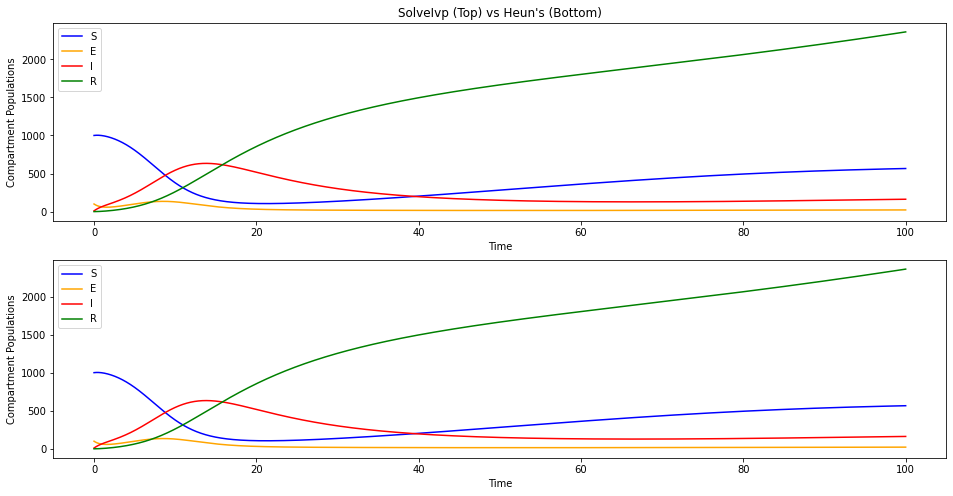

In [20]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8))

ax1.set_title("SolveIvp (Top) vs Heun's (Bottom)")
plot_SEIR2(solver=SolveIvp, alpha=alpha, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, h=0.01, ax=ax1)

plot_SEIR2(solver=MultiHeun, alpha=alpha, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, h=0.01, ax=ax2)
plt.show()

The graphs produced using SolveIvp and Heun's look highly similar to each other.

#### Discrete vs Continuous

SEIR using MultiHeun


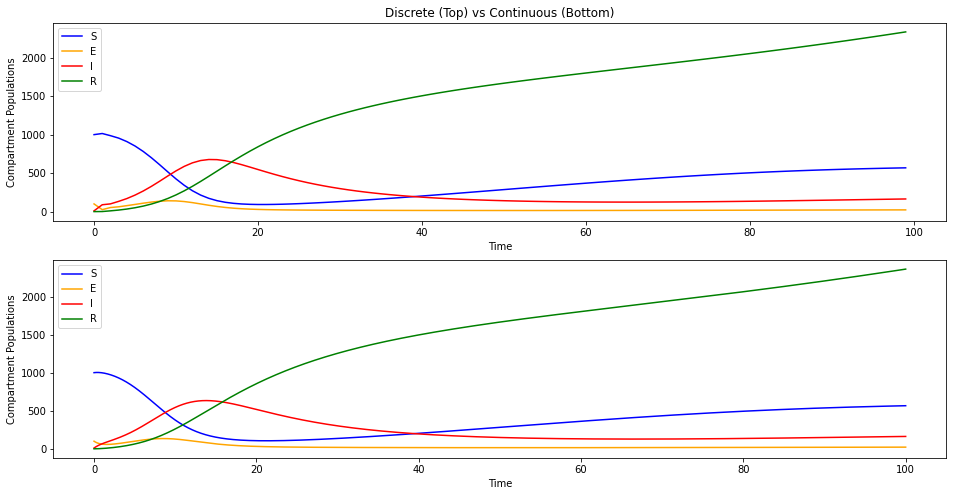

In [21]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8))

ax1.set_title("Discrete (Top) vs Continuous (Bottom)")
plot_SEIR(alpha=alpha, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, ax=ax1)

plot_SEIR2(solver=MultiHeun, alpha=alpha, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, h=0.01, ax=ax2)
plt.show()

The graphs produced using Discrete Method and Continuous Method also seems similar to each other.

SEIR using MultiHeun


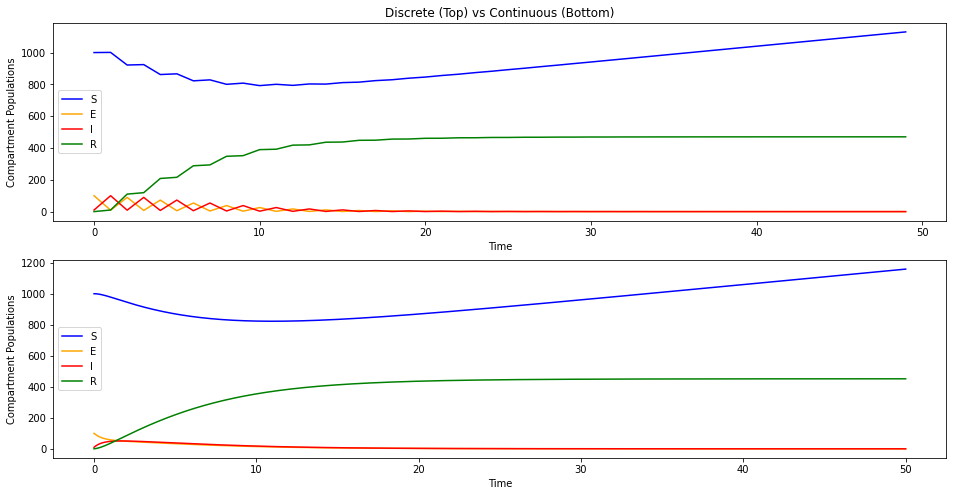

In [22]:
alpha=10
beta = gamma = theta = 1
time_length = 50
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8))

ax1.set_title("Discrete (Top) vs Continuous (Bottom)")
plot_SEIR(alpha=alpha, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, ax=ax1)

plot_SEIR2(solver=MultiHeun, alpha=alpha, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, h=0.01, ax=ax2)
plt.show()

SEIR using SolveIvp


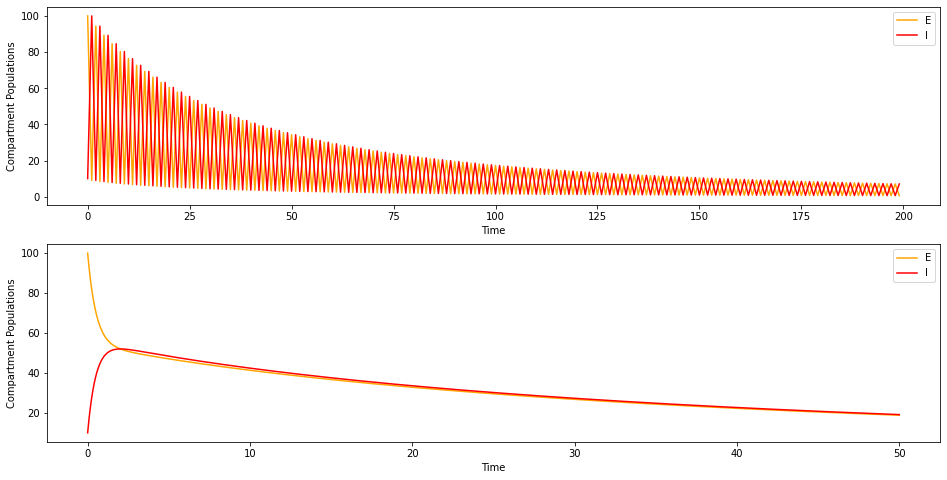

In [23]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8))
alpha = 1000
plot_SEIR(alpha=alpha, beta=beta, gamma=gamma, theta=theta, S=False, R=False, time_length=time_length*4, ax=ax1)
plot_SEIR2(alpha=alpha, beta=beta, gamma=gamma, theta=theta, S=False, R=False, time_length=time_length, h=0.01, ax=ax2)
plt.show()

However, Continuous Model able to smooth the zig-zag effect that occur with Discrete Model. The zig-zag from Discrete Model seems to oscillate between the line produced by Continuous Model.

### Part 4 - Stochastic Modelling

Until now we have assumed that all events occur deterministically. Lets add some randomness to our system and see what happens. 

We will implement a Gillespie Algorithm version of the solver and simulate the behaviour on the system. 

As usual, we will do it for multiple sets of initial conditions and model parameters. 

We will plot and explain the results. In particular, how does the addition of randomness affect the results? 


In [24]:
def gillespie_seir(seir_init, alpha, beta, gamma, theta, t_max=100):
    SEIRs = np.array([seir_init]) # np.array
    y_gen = SEIR_gen(alpha, beta, gamma, theta)
    T = [0,0]
    t = 0
    dt = 1
    while t < t_max:
        # Calculate the dSEIRdt
        dy = y_gen(t, SEIRs[-1])
        
        # Calculate the rates of the events
        y = SEIRs[-1]
        
        rate_susceptible = (T[-1] - T[-2])*alpha
        rate_exposed = beta * y[0] * y[2] / sum(y)
        rate_infected = gamma * y[1]
        rate_recovery = theta * y[1]
        p = np.array([rate_susceptible, rate_exposed, rate_infected, rate_recovery])
        p = np.nan_to_num(abs((p>0)*p))
        p_total = sum(p)
        p_rel = p/p_total
        
        # Calculate the time to the next event
        dt = np.random.exponential(p_rel/10)        

        # Select the next event to occur
        idx = np.random.choice(range(len(p)), p=p_rel)
        
        # Get the next y
        h = dt[idx]
        k1 = y_gen(t, y)
        k2 = y_gen(t+h, y+h*k1)
        dy = h*(k1+k2)/2 
        
        # Events 
        a = 1 # Number of individual
        if idx == 0: # Susceptible
            dy = dy + np.array([a,0, 0, 0])
        elif idx == 1: # Exposed
            dy = dy + np.array([-a, a, 0, 0])
        elif idx == 2: # Infected
            dy = dy + np.array([0, -a, a, 0])
        else: # Recovered
            dy = dy + np.array([0, 0, -a, a])

        # Append to SEIRs
        seir = SEIRs[-1] + dy
        SEIRs = np.vstack([SEIRs, seir])
        t = t + h
        T.append(t)
    
    return T[1:], SEIRs

In [25]:
def plot_SEIR3(df=SolveIvp, alpha=20, beta=0.8, gamma=0.5, theta=0.2, S_init=1000, E_init=100, I_init=10, time_length=100, S=True, E=True, I=True, R=True, ax=None):
    params = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'theta':theta}
    SEIR = SEIR_gen(alpha, beta, gamma, theta)
    SEIR_init = np.array([S_init, E_init, I_init, 0]) # Initial recovered is 0
    t, SEIRs = gillespie_seir(SEIR_init, alpha, beta, gamma, theta, t_max=time_length)
    if ax:
        plot = ax
        plot.set_xlabel('Time')
        plot.set_ylabel('Compartment Populations')

    else:
        plot = plt
        plt.figure(figsize=(10,6))
        plt.xlabel('Time')
        plt.ylabel('Compartment Populations')

    if S:
        plot.plot(t, SEIRs[:, 0], label='S', color="blue")
    if E:
        plot.plot(t, SEIRs[:, 1], label='E', color="orange")
    if I:
        plot.plot(t, SEIRs[:, 2], label='I', color="red")
    if R:
        plot.plot(t, SEIRs[:, 3], label='R', color="green")

    plot.legend()
    if ax == None:
        plt.show()
    
S_box =checkbox("Susceptible"); E_box = checkbox("Exposed"); I_box = checkbox("Infected"); R_box = checkbox("Recovered")
checkboxes = widgets.HBox([S_box, E_box, I_box, R_box], layout={'width': '500px','margin':'0 0 10px 0'})

S_slide = slider_int(1000, 0, 10000, 1, "$S_0:$")
E_slide = slider_int(100, 0, 10000, 1, "$E_0:$")
I_slide = slider_int(10, 0, 10000, 1, "$I_0:$")
T_slide = slider_int(100, 0, 1000, 1, "$Time:$")
alpha_slide = slider_int(20, 0, 1000, 1, '$\\alpha:$')
beta_slide = slider_float(0.8, 0, 1, 0.00001, '$\\beta\:$')
gamma_slide = slider_float(0.5, 0, 1, 0.00001, '$\\gamma\:$')
theta_slide = slider_float(0.2, 0, 1, 0.00001, '$\\theta\:$')
h_text = widgets.BoundedFloatText(value=0.01, min=0.01, max=10, step=0.01, description='$h:$',layout={'width':'150px'})
gen = widgets.Dropdown(options=[('SolveIvp', SolveIvp), ('Heun\'s Method (RK2)', MultiHeun)], value=SolveIvp,description='Solver:',)
sliders = widgets.VBox([gen, alpha_slide, beta_slide, gamma_slide, theta_slide, h_text, S_slide, E_slide, I_slide, T_slide])

out = widgets.interactive_output(plot_SEIR3, {'alpha':alpha_slide, 'beta':beta_slide, 'gamma':gamma_slide, 
                                             'theta':theta_slide, 'S_init':S_slide, 'E_init':E_slide,
                                             'I_init':I_slide, 'time_length':T_slide, "S":S_box,
                                             'E':E_box, 'I':I_box, 'R':R_box}) 

ui = widgets.HBox([widgets.VBox([checkboxes, sliders]), out])
display(ui)

#### Deterministic vs Stochastic

In [26]:
# Initial Value
alpha=10
beta=0.6
gamma=0.8
theta=0.1
S_init=1000
E_init=100
I_init=10
time_length=200

SEIR using SolveIvp


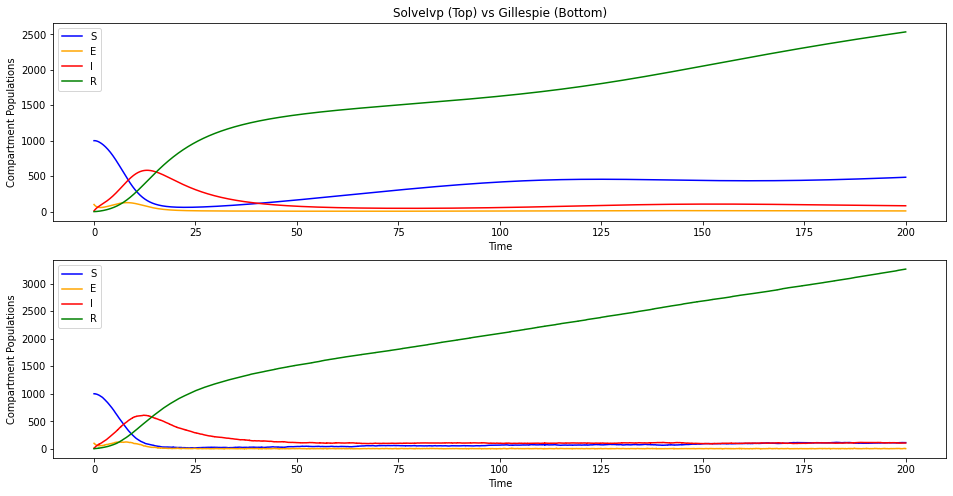

In [27]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8))
ax1.set_title("SolveIvp (Top) vs Gillespie (Bottom)")
plot_SEIR2(alpha=alpha, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, h=0.1, ax=ax1)

plot_SEIR3(alpha=alpha, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, ax=ax2)
plt.show()

SEIR using SolveIvp


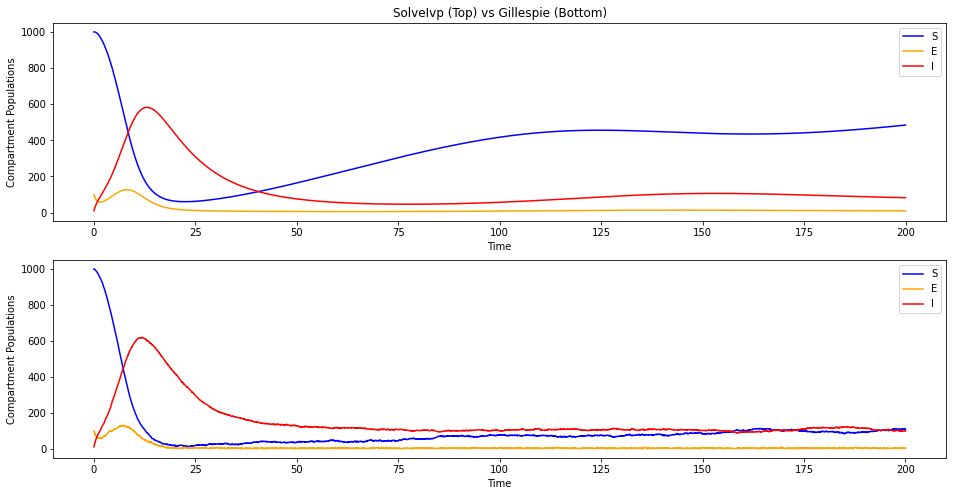

In [28]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8))
ax1.set_title("SolveIvp (Top) vs Gillespie (Bottom)")
plot_SEIR2(R=False, alpha=alpha, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, h=0.1, ax=ax1)

plot_SEIR3(R=False, alpha=alpha, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, ax=ax2)
plt.show()

As can be seen, despite having similar initial conditions, both graph differ greatly as time increases. The final $R$ on Stochastic Model is much higher than $R$ in Deterministic Model. And the value of $S$, $E$, $I$ for Stochastic Model seems closer to 0 compared to the deterministic model.

SEIR using SolveIvp


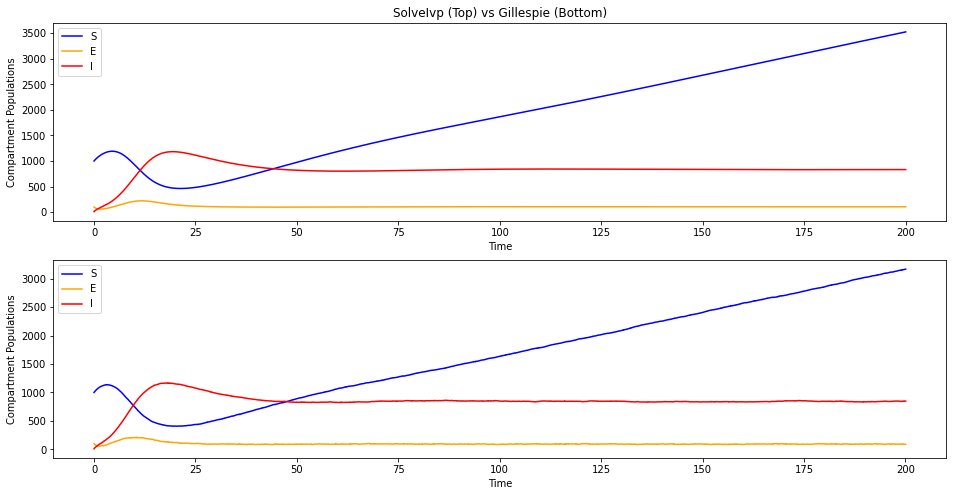

In [29]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8))
alpha_new = 100

ax1.set_title("SolveIvp (Top) vs Gillespie (Bottom)")
plot_SEIR2(R=False, alpha=alpha_new, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, h=0.1, ax=ax1)

plot_SEIR3(R=False, alpha=alpha_new, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, ax=ax2)
plt.show()

By increasing alpha, the Deterministic Model's $S$, $E$, $I$ become more similar to Stochastic Model's (although slightly higher in value).

SEIR using SolveIvp


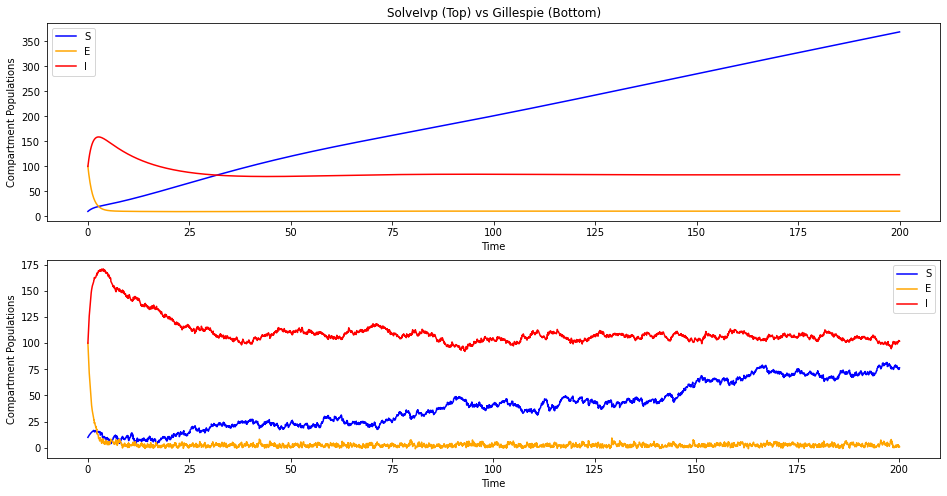

In [30]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8))
S_init = 10
E_init = 100
I_init = 100
ax1.set_title("SolveIvp (Top) vs Gillespie (Bottom)")
plot_SEIR2(R=False, alpha=alpha, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, h=0.1, ax=ax1)

plot_SEIR3(R=False, alpha=alpha, beta=beta, gamma=gamma, theta=theta, S_init=S_init, E_init=E_init, I_init=I_init, time_length=time_length, ax=ax2)
plt.show()

From all previous graphs, it's apparent that the rate at which Susceptible is growing is much slower in Stochastic Model compred to Deterministic Model. To test this, we set $S_0$ to be relatively smaller than $E_0$ and $I_0$, and as can be seen, the Deterministic Model has faster growt of Susceptible compared to Stochastic Model.

### Part 5  - Steady State Analysis

Some dynamical systems will eventually converge to a steady state, where the rate of change for each compartment is 0. 

Does the model have any steady states? If so, where are they located? How stable are they? Why?

We will be using the following methods;
* Cobwebbing
* Phase Plane Analysis
* Plotting the dynamics with a very long time horizon

And will justify the use (or lack of use) of said methods, and explain what the results mean. 

#### Cobwebbing

In [31]:
alpha=20
beta=0.8
gamma=0.5
theta=0.2
S_init=1000
E_init=100
I_init=10
time_length=200

gen = SEIR_generator(alpha, beta, gamma, theta)
params = {'alpha':20, 'beta':beta, 'gamma':gamma, 'theta':theta}
SEIRs = SEIR_values(params, np.array([S_init, E_init, I_init, 0]), max_iter=time_length, verbose=False)

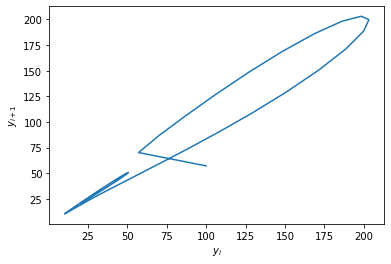

In [32]:
option = 1 # S:0, E:1, I:2, R:3
y = SEIRs[:, option]
yp1 = y[1:]
y = y[:-1]

plt.plot(y, yp1)
plt.ylabel("$y_{i+1}$")
plt.xlabel("$y_i$")
plt.show()

Above is the graph of $y_{i+1}$ against $y_i$ (y depends on option, here it is Exposed). As can be seen, the function produce is not a one-to-one function, and therefore cobwebbing is not suitable to find the steady state. 

#### Phase Plane Analysis    

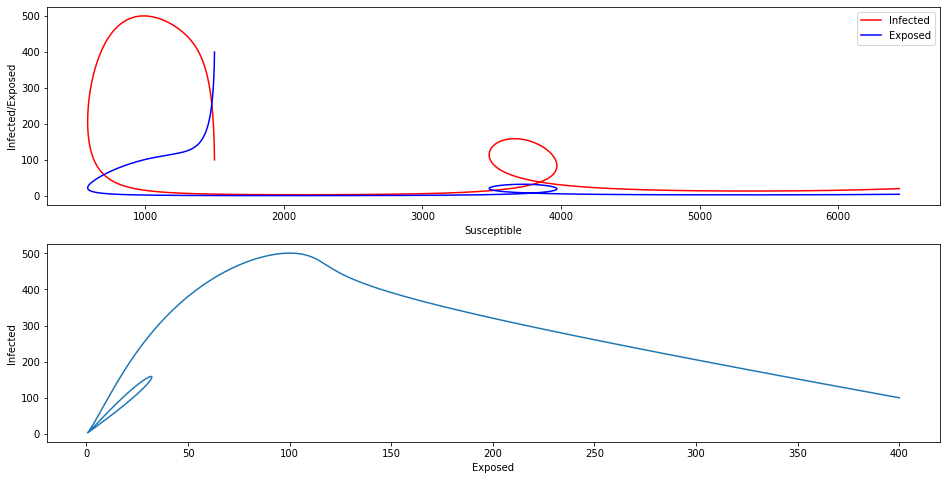

In [33]:
S0, E0, I0, R0 = 1500, 400, 100, 0
seir_init = np.array([S0, E0, I0, R0])
gen = SEIR_gen(alpha=10, beta=0.2, gamma=0.5, theta=0.1)
t, SEIRs = SolveIvp(gen, seir_init, 0.1, t_init=0, t_max=1000)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8))

ax1.plot(SEIRs[:, 0], SEIRs[:, 2], 'r', label='Infected')
ax1.plot(SEIRs[:, 0], SEIRs[:, 1], 'b', label='Exposed')
ax1.set_ylabel('Infected/Exposed')
ax1.set_xlabel('Susceptible')
ax1.legend()

ax2.plot(SEIRs[:,1], SEIRs[:,2])
ax2.set_xlabel('Exposed')
ax2.set_ylabel('Infected')
plt.show()

From the phase plane above, it seems that steady state couldn't be found using phase plane analysis. 

#### Plotting the dynamics with a very long time horizon
A steady state where rate of change $\frac{dS}{dt}$, $\frac{dE}{dt}$, $\frac{dI}{dt}$, $\frac{dR}{dt}$ is 0 can only be obtained when $\alpha$ is zero. This is due to the fact that rate of change flow such that $\frac{dS}{dt}$ -> $\frac{dE}{dt}$ -> $\frac{dI}{dt}$ -> $\frac{dR}{dt}$, and $\frac{dS}{dt}$ will always be greater than 0 as long as $\alpha$ is greater than 0.

SEIR using SolveIvp


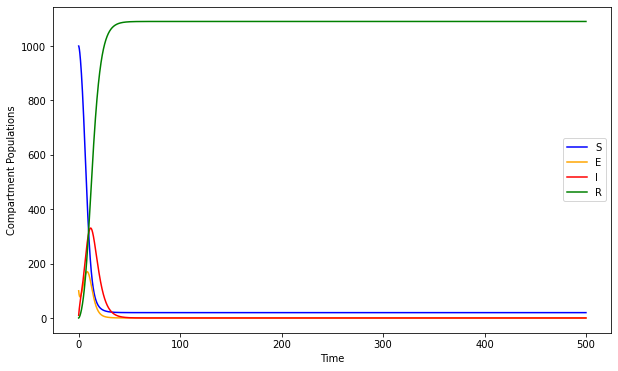

In [34]:
alpha = 0
h = 0.1
time_length=500
plot_SEIR2(solver=SolveIvp, alpha=alpha, time_length=500, h=h)

SEIR using SolveIvp
SEIR using SolveIvp


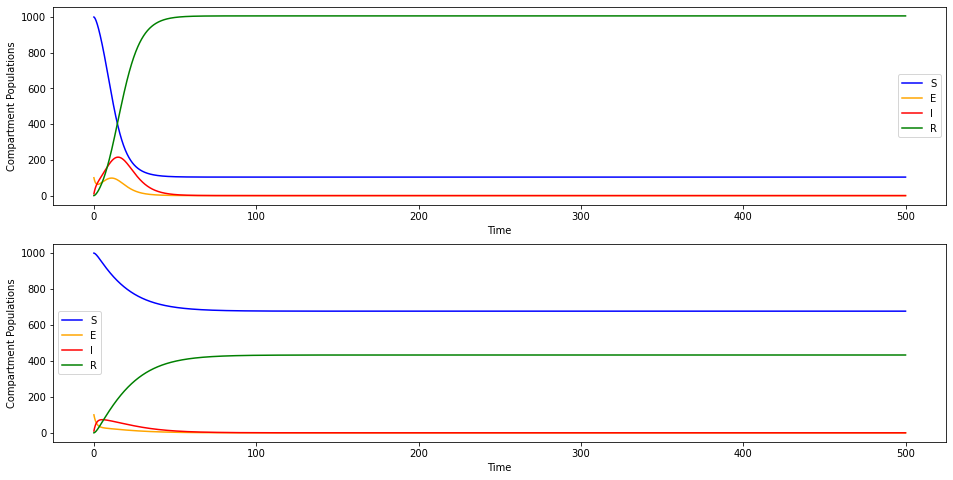

In [35]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8))
alpha = 0
beta = 0.5
plot_SEIR2(alpha=alpha, beta=beta, gamma=gamma, time_length=time_length, h=h, ax=ax1)

beta = 0.2
plot_SEIR2(alpha=alpha, beta=beta, gamma=gamma, time_length=time_length, h=h, ax=ax2)
plt.show()

Reducing $\beta$ will increase the steady state value of $S$ and decrease the steady state value of $R$. This make sense as $\beta$ negatively affect the rate of susceptible. Lower beta will result in higher rate of susceptible.

SEIR using SolveIvp
SEIR using SolveIvp


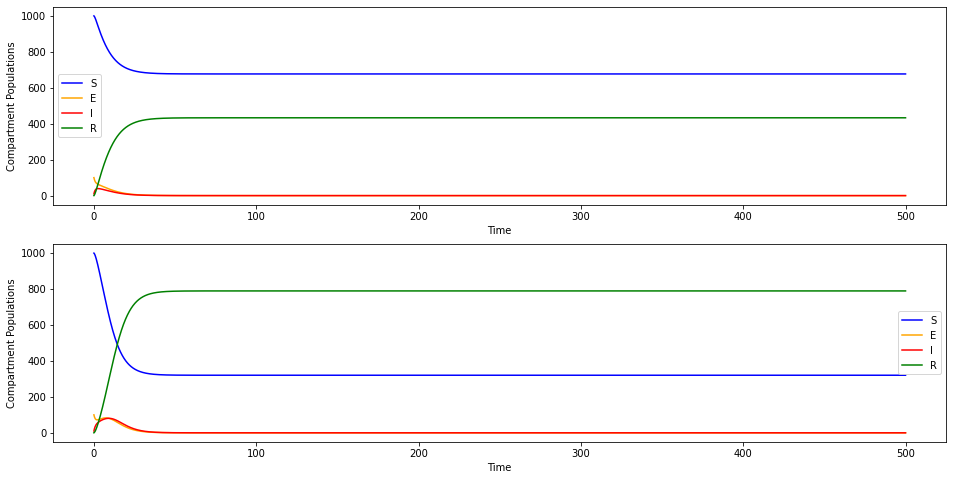

In [36]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8))
alpha = 0
theta = 0.8
plot_SEIR2(alpha=alpha, theta=theta, time_length=time_length, h=h, ax=ax1)

theta = 0.5
plot_SEIR2(alpha=alpha, theta=theta, time_length=time_length, h=h, ax=ax2)
plt.show()

Reducing $\theta$ will reduce the steady state value of $S$ and increase steady state value of $R$. This make sense as $\theta$ affect the rate of recovery, and as rate of recovery increase, the rate of people recovered will also increased until there's no more people who are infected.

SEIR using SolveIvp
SEIR using SolveIvp


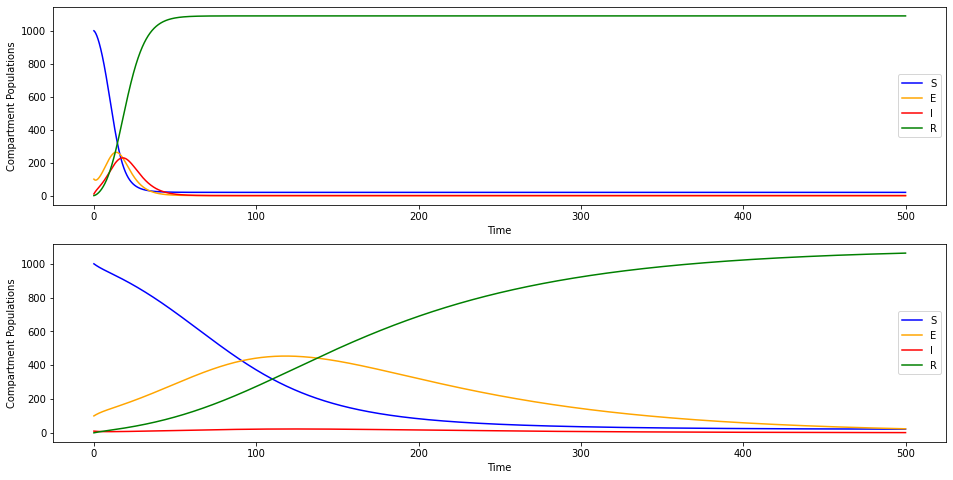

In [37]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8))
alpha = 0
gamma = 0.2
plot_SEIR2(alpha=alpha, gamma=gamma, time_length=time_length, h=h, ax=ax1)

gamma = 0.01
plot_SEIR2(alpha=alpha, gamma=gamma, time_length=time_length, h=h, ax=ax2)
plt.show()

Reducing $\gamma$ will increase the amount of time it takes to reach steady state. This is due the fact that $\gamma$ determine the rate of infection of those who are exposed, when $\gamma$ is low, number of newly infected individuals are also low. The rate of $R$ is positively correlated with infection rate, and the rate of $S$ and $E$ is negatively correlated with infection rate, hence when infection rate is low, $R$, $S$, $E$ also take a long time to converge to steady state.